In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据

In [2]:
train_data = pd.read_csv("../data/pubg/train_V2.csv")
train_data.shape

(4446966, 29)

In [3]:
train_data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


## 字段基本描述

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

## 综合统计

In [5]:
train_data.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


## 查看有多少场比赛

两种写法

In [6]:
train_data["matchId"].unique().shape

(47965,)

In [7]:
np.unique(train_data["matchId"]).shape

(47965,)

## 查看有多少个队伍

In [8]:
train_data["groupId"].unique().shape

(2026745,)

# 数据基本处理

## 数据缺失值处理

In [9]:
np.any(train_data.isnull())

True

In [10]:
# 这一列有空余值
np.any(train_data["winPlacePerc"].isnull())

True

In [11]:
train_data[train_data["winPlacePerc"].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [14]:
# inplace=True 修改原值
train_data.drop(2744604, axis=0, inplace=True)

In [15]:
np.any(train_data.isnull())

False

# 特征值数据规范化处理

## 查看每场比赛参加的人数

In [18]:
# 按照matchId分组,再获取matchId,再通过transform进行个数统计
count = train_data.groupby("matchId")["matchId"].transform("count")
count.iloc[:10]
# 可以看出count是按照原有id进行匹配的,所以可以放进原表

0    96
1    91
2    98
3    91
4    97
5    95
6    97
7    96
8    97
9    97
Name: matchId, dtype: int64

In [19]:
count.shape
# 和原数据相同行(少了null行)

(4446965,)

In [20]:
# 将每一场人数添加到数据中
train_data["playersJoined"] = count

In [21]:
train_data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playersJoined'],
      dtype='object')

In [23]:
# 按照数据多少进行排序,法线有人数很少的比赛
train_data["playersJoined"].sort_values().head()

1206365    2
2109739    2
3956552    5
3620228    5
696000     5
Name: playersJoined, dtype: int64

<AxesSubplot: xlabel='playersJoined', ylabel='count'>

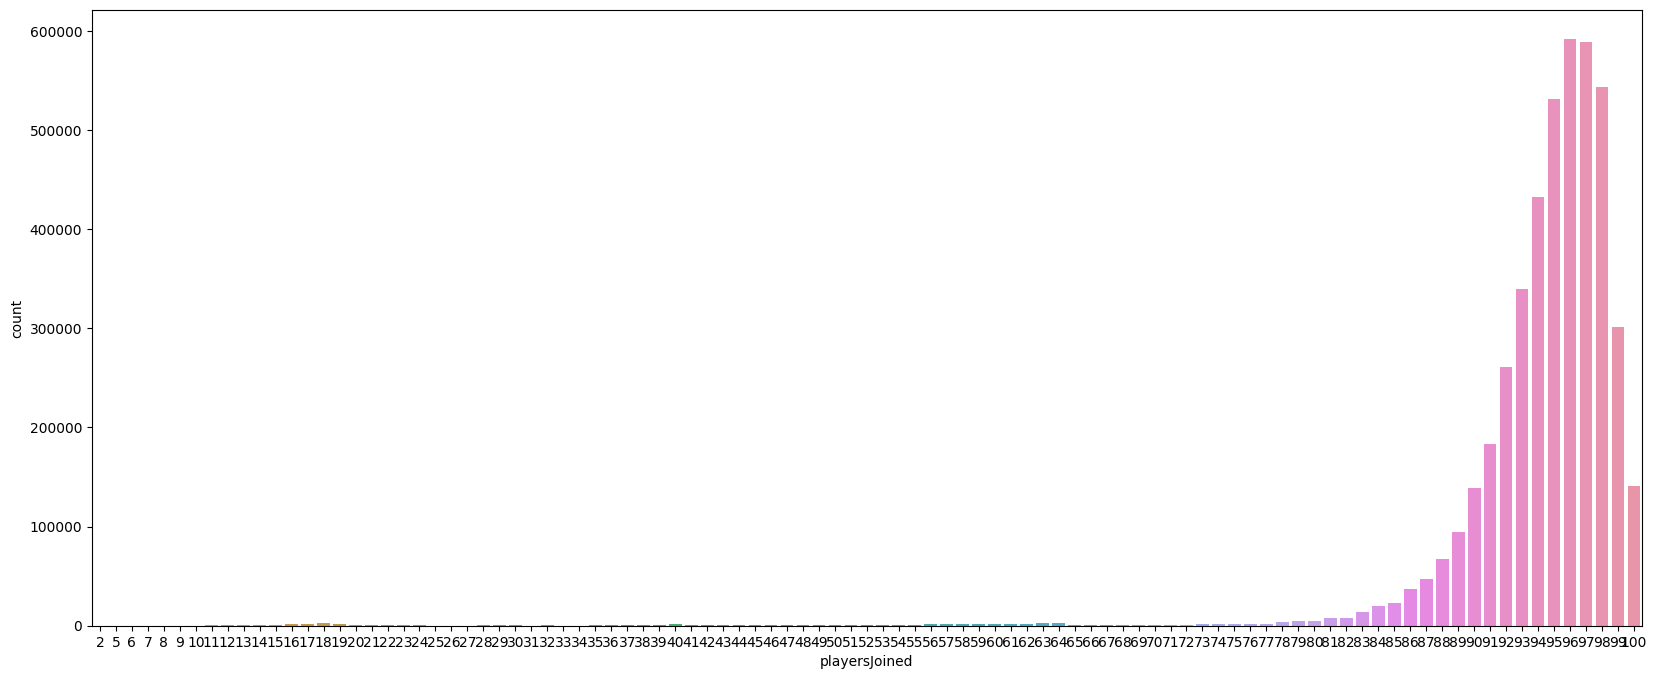

In [25]:
plt.figure(figsize=(20, 8))
sns.countplot(x=train_data["playersJoined"])
# 有很多场人很少

### 获取每场人数多于75人的比赛

In [41]:
train_data_75 = train_data[train_data["playersJoined"] > 75]
train_data_75.shape

(4387994, 30)

<AxesSubplot: xlabel='playersJoined', ylabel='count'>

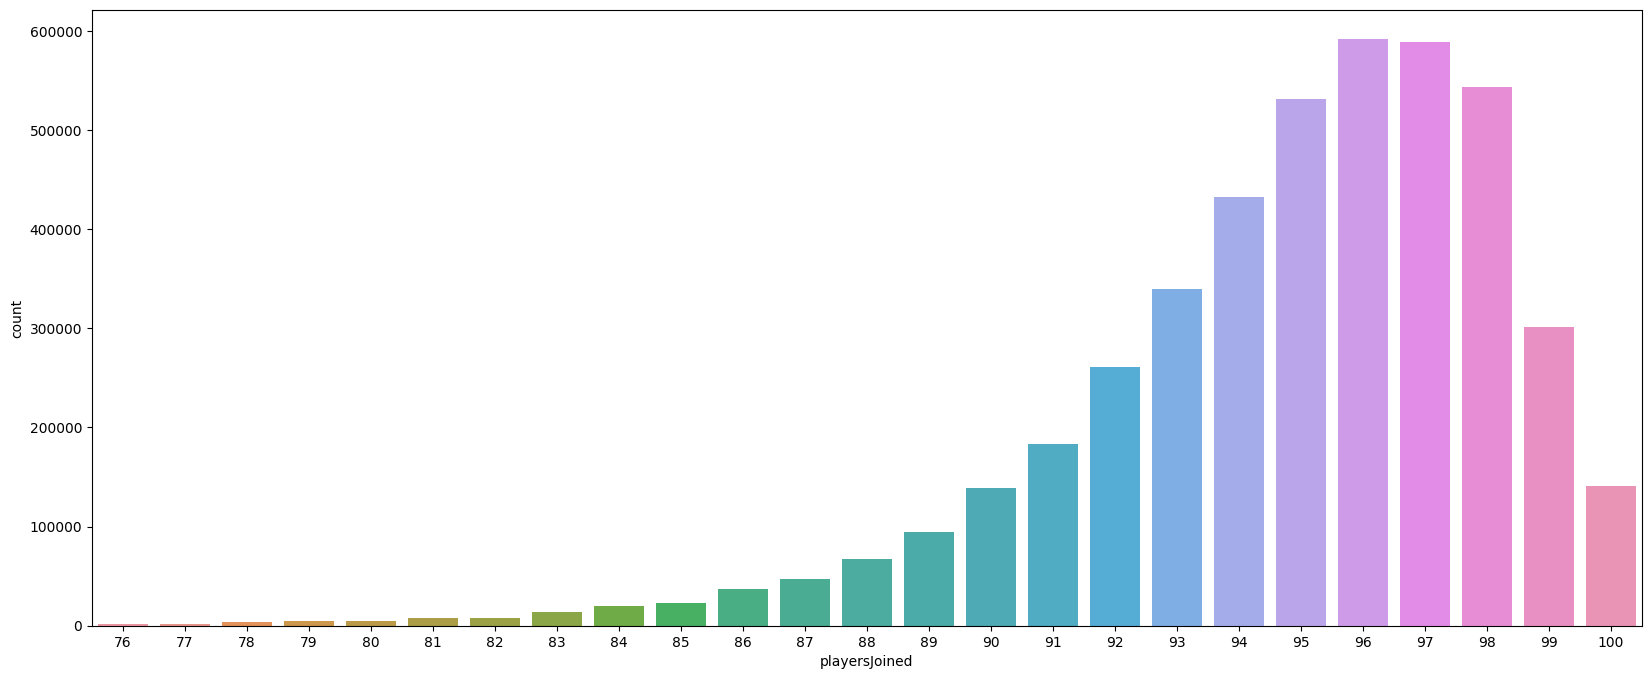

In [42]:
plt.figure(figsize=(20, 8))
sns.countplot(x=train_data_75["playersJoined"])

## 规范化输出部分数据

In [43]:
train_data_75["killsNorm"] = train_data_75["kills"] * (
    (100 - train_data_75["playersJoined"]) / 100 + 1
)
train_data_75["killsNorm"]

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11968\3062592548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_75["killsNorm"] = train_data_75["kills"] * ((100-train_data_75["playersJoined"])/100+1)


0          0.00
1          0.00
2          0.00
3          0.00
4          1.03
           ... 
4446961    0.00
4446962    0.00
4446963    0.00
4446964    2.12
4446965    2.04
Name: killsNorm, Length: 4387994, dtype: float64

In [44]:
train_data_75["damageDealtNorm"] = train_data_75["damageDealt"] * (
    (100 - train_data_75["playersJoined"]) / 100 + 1
)
train_data_75["maxPlaceNorm"] = train_data_75["maxPlace"] * (
    (100 - train_data_75["playersJoined"]) / 100 + 1
)
train_data_75["matchDurationNorm"] = train_data_75["matchDuration"] * (
    (100 - train_data_75["playersJoined"]) / 100 + 1
)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11968\2798426023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_75["damageDealtNorm"] = train_data_75["damageDealt"] * \
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11968\2798426023.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_75["maxPlaceNorm"] = train_data_75["maxPlace"] * \
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11968\2798426023.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [45]:
# 比较经过规范化的特征值和原始特征值的值
to_show = [
    "Id",
    "kills",
    "killsNorm",
    "damageDealt",
    "damageDealtNorm",
    "maxPlace",
    "maxPlaceNorm",
    "matchDuration",
    "matchDurationNorm",
]
train_data_75[to_show][:11]

,Id,kills,killsNorm,damageDealt,damageDealtNorm,maxPlace,maxPlaceNorm,matchDuration,matchDurationNorm
0,7f96b2f878858a,0,0.00,0.000,0.00000,28,29.12,1306,1358.24
1,eef90569b9d03c,0,0.00,91.470,99.70230,26,28.34,1777,1936.93
2,1eaf90ac73de72,0,0.00,68.000,69.36000,50,51.00,1318,1344.36
3,4616d365dd2853,0,0.00,32.900,35.86100,31,33.79,1436,1565.24
4,315c96c26c9aac,1,1.03,100.000,103.00000,97,99.91,1424,1466.72
5,ff79c12f326506,1,1.05,100.000,105.00000,28,29.40,1395,1464.75
6,95959be0e21ca3,0,0.00,0.000,0.00000,28,28.84,1316,1355.48
7,311b84c6ff4390,0,0.00,8.538,8.87952,96,99.84,1967,2045.68
8,1a68204ccf9891,0,0.00,51.600,53.14800,28,28.84,1375,1416.25
9,e5bb5a43587253,0,0.00,37.270,38.38810,29,29.87,1930,1987.90


## 部分变量合成

In [46]:
train_data_75["healsandboosts"] = train_data_75["heals"] + train_data_75["boosts"]
train_data_75[["heals", "boosts", "healsandboosts"]].tail()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11968\2957219492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_75['healsandboosts'] = train_data_75['heals'] + train_data_75['boosts']


,heals,boosts,healsandboosts
4446961,0,0,0
4446962,0,1,1
4446963,0,0,0
4446964,2,4,6
4446965,1,2,3


## 异常值处理

### 删除有击杀,但完全没有移动的玩家

In [47]:
# 总移动距离 = 载具 + 走路 + 游泳
train_data_75["totalDistance"] = (
    train_data_75["rideDistance"]
    + train_data_75["walkDistance"]
    + train_data_75["swimDistance"]
)
train_data_75["totalDistance"].sort_values().head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11968\2714516451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_75["totalDistance"] = train_data_75["rideDistance"] + train_data_75["walkDistance"] + train_data_75["swimDistance"]


2260569    0.0
2898757    0.0
1710858    0.0
4016883    0.0
1296055    0.0
Name: totalDistance, dtype: float64

In [48]:
# 有杀敌但没有移动的玩家,返回真和假
train_data_75["killWithoutMoving"] = (train_data_75["kills"] > 0) & (
    train_data_75["totalDistance"] == 0
)
train_data_75["killWithoutMoving"].head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11968\1657010715.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_75["killWithoutMoving"] = (train_data_75["kills"] > 0) & (train_data_75["totalDistance"] == 0)


0    False
1    False
2    False
3    False
4    False
Name: killWithoutMoving, dtype: bool

In [80]:
kill_without_moving_id = train_data_75[
    (train_data_75["killWithoutMoving"] == True)
].index
kill_without_moving_id

Int64Index([  32720,   50388,   58577,   64047,   91841,   94460,   95288,
              95971,  122554,  150734,
            ...
            4291516, 4314623, 4327837, 4328701, 4353993, 4375614, 4392074,
            4396644, 4418548, 4432954],
           dtype='int64', length=272)

In [81]:
train_data_normal = train_data_75.drop(kill_without_moving_id, axis=0)
train_data_normal.shape

(4387722, 37)

### 删除驾车杀敌数异常的数据

In [82]:
# 开车杀敌大于10
drive_kill_id = train_data_normal[train_data_normal["roadKills"] > 10].index
drive_kill_id

Int64Index([2733926, 2767999, 3524413], dtype='int64')

In [83]:
train_data_normal.drop(drive_kill_id, axis=0, inplace=True)
train_data_normal.shape

(4387719, 37)

### 删除杀敌数超出30人的

<AxesSubplot: xlabel='kills', ylabel='count'>

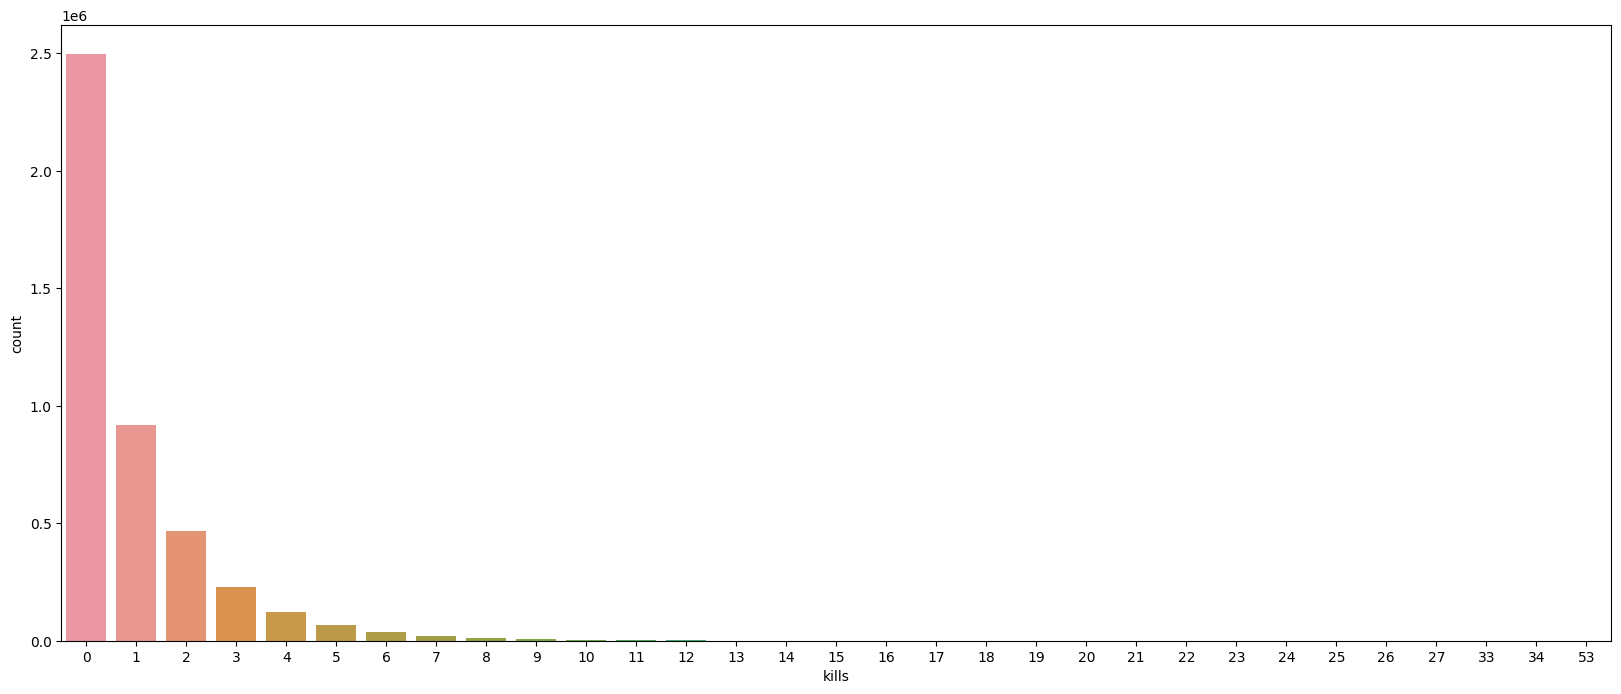

In [84]:
plt.figure(figsize=(20, 8))
sns.countplot(x=train_data_normal["kills"])

In [85]:
kill_over_30_id = train_data_normal[train_data_normal["kills"] > 30].index
kill_over_30_id

Int64Index([2020831, 2803464, 3840888], dtype='int64')

In [86]:
train_data_normal.drop(kill_over_30_id, axis=0, inplace=True)
train_data_normal.shape

(4387716, 37)

### 删除爆头率异常数据

In [87]:
train_data_normal["headshot_rate"] = (
    train_data_normal["headshotKills"] / train_data_normal["kills"]
)

In [88]:
# 除法会出现为nan,所以填充0
np.any(train_data_normal.isna())

True

In [89]:
# nan填充为0
train_data_normal["headshot_rate"].fillna(0, inplace=True)

In [90]:
np.any(train_data_normal.isna())

False

In [91]:
# 爆头率 100%
train_data_normal["headshot_rate"].sort_values().tail()

3129309    1.0
1095815    1.0
935371     1.0
1646806    1.0
3729374    1.0
Name: headshot_rate, dtype: float64

In [92]:
# 删除杀敌数大于9且爆头率为100的数据
head100_id = train_data_normal[
    (train_data_normal["kills"] > 9) & (train_data_normal["headshot_rate"] == 1)
].index
head100_id

Int64Index([ 281570,  346124,  871244,  908815,  963463, 1079403, 1167959,
            1348164, 1380385, 1483199, 1581850, 1622232, 1753322, 2256755,
            2375749, 2647056, 2825200, 3288424, 3594399, 3926325, 4036281,
            4351048, 4387092, 4428741],
           dtype='int64')

In [93]:
train_data_normal.drop(head100_id, axis=0, inplace=True)
train_data_normal.shape

(4387692, 38)

### 删除最远杀敌异常数据

In [94]:
longest_kill_id = train_data_normal[train_data_normal["longestKill"] >= 1000].index
longest_kill_id

Int64Index([202281, 895411, 2981715], dtype='int64')

In [95]:
train_data_normal.drop(longest_kill_id, axis=0, inplace=True)
train_data_normal.shape

(4387689, 38)

### 删除运动距离的异常值

#### 步行

In [96]:
walk_10000 = train_data_normal[train_data_normal["walkDistance"] >= 10000].index
walk_10000

Int64Index([  23026,   49312,   68590,  125103,  136421,  136476,  154080,
             154128,  159186,  172600,
            ...
            4181311, 4230073, 4259976, 4284974, 4288445, 4306598, 4370543,
            4380785, 4405009, 4415088],
           dtype='int64', length=214)

In [97]:
train_data_normal.drop(walk_10000, axis=0, inplace=True)
train_data_normal.shape

(4387475, 38)

#### 载具

In [98]:
ride_20000 = train_data_normal[train_data_normal["rideDistance"] >= 20000].index
ride_20000

Int64Index([  28588,   63015,   70507,   72763,   95276,  140097,  297186,
             371098,  403647,  426708,
            ...
            4150057, 4154459, 4191491, 4239725, 4248221, 4256764, 4270943,
            4301013, 4386384, 4440261],
           dtype='int64', length=144)

In [99]:
train_data_normal.drop(ride_20000, axis=0, inplace=True)
train_data_normal.shape

(4387331, 38)

#### 游泳

In [100]:
swin_2000 = train_data_normal[train_data_normal["swimDistance"] >= 2000].index
swin_2000

Int64Index([ 177973,  274258, 1005337, 1195818, 1227362, 1889163, 2065940,
            2327586, 2784855, 3359439, 3513522, 4132225],
           dtype='int64')

In [101]:
train_data_normal.drop(swin_2000, axis=0, inplace=True)
train_data_normal.shape

(4387319, 38)

## 武器收集数据异常

In [102]:
weapon_id = train_data_normal[train_data_normal["weaponsAcquired"] >= 80].index
weapon_id

Int64Index([ 233643,  588387, 1437471, 1449293, 1834515, 2442962, 2743408,
            2749693, 2797867, 2973445, 2977084, 2982525, 3951710, 4022031],
           dtype='int64')

In [103]:
train_data_normal.drop(weapon_id, axis=0, inplace=True)
train_data_normal.shape

(4387305, 38)

### 治疗药物异常

In [104]:
heal_id = train_data_normal[train_data_normal["heals"] >= 80].index
heal_id

Int64Index([4262662], dtype='int64')

In [105]:
train_data_normal.drop(heal_id, axis=0, inplace=True)
train_data_normal.shape

(4387304, 38)

# 类别型数据处理

## 比赛类型ont-hot处理

In [106]:
# 比赛类型
train_data_normal["matchType"].unique()

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
       'crashfpp', 'flaretpp', 'normal-duo-fpp', 'normal-squad-fpp',
       'flarefpp', 'crashtpp', 'normal-squad'], dtype=object)

In [107]:
# 比赛类型转换成0 1 2
train_data_one_hot = pd.get_dummies(train_data_normal, columns=["matchType"])
train_data_one_hot.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,matchType_duo-fpp,matchType_flarefpp,matchType_flaretpp,matchType_normal-duo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0,0,0,0,0,0,0,0,1
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0,0,0,0,0,0,0,0,1
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0,0,0,0,0,0,0,0,0
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0,0,0,0,0,0,0,0,1
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0,0,0,0,0,0,1,0,0


In [109]:
# pandas正则化找数据
matchTpye_encoding = train_data_one_hot.filter(regex="matchType")
matchTpye_encoding.head()

,matchType_crashfpp,matchType_crashtpp,matchType_duo,matchType_duo-fpp,matchType_flarefpp,matchType_flaretpp,matchType_normal-duo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,1,0,0


## 对groupId,matchId进行处理

### groupId

In [110]:
train_data_one_hot["groupId"].head()
# 类型为object

0    4d4b580de459be
1    684d5656442f9e
2    6a4a42c3245a74
3    a930a9c79cd721
4    de04010b3458dd
Name: groupId, dtype: object

In [111]:
# 类型改为category
train_data_one_hot["groupId"] = train_data_one_hot["groupId"].astype("category")
train_data_one_hot["groupId"].head()
# 类型为category

0    4d4b580de459be
1    684d5656442f9e
2    6a4a42c3245a74
3    a930a9c79cd721
4    de04010b3458dd
Name: groupId, dtype: category
Categories (2002877, object): ['00000c08b5be36', '00000d1cbbc340', '000025a09dd1d7', '000038ec4dff53', ..., 'fffff305a0133d', 'fffff32bc7eab9', 'fffff7edfc4050', 'fffff98178ef52']

In [113]:
train_data_one_hot["groupId_cat"] = train_data_one_hot["groupId"].cat.codes
train_data_one_hot["groupId_cat"].head()
# 类型为int

0     606565
1     818060
2     833566
3    1324636
4    1737142
Name: groupId_cat, dtype: int32

### matchId

In [114]:
train_data_one_hot["matchId"].head()
# 类型为object

0    a10357fd1a4a91
1    aeb375fc57110c
2    110163d8bb94ae
3    f1f1f4ef412d7e
4    6dc8ff871e21e6
Name: matchId, dtype: object

In [115]:
# 类型改为category
train_data_one_hot["matchId"] = train_data_one_hot["matchId"].astype("category")
train_data_one_hot["matchId"].head()
# 类型为category

0    a10357fd1a4a91
1    aeb375fc57110c
2    110163d8bb94ae
3    f1f1f4ef412d7e
4    6dc8ff871e21e6
Name: matchId, dtype: category
Categories (46351, object): ['0000a43bce5eec', '0000eb01ea6cdd', '0002912fe5ed71', '0003b92987589e', ..., 'fffe53015be300', 'fffe562611d981', 'fffe721f841f85', 'fffe92232706aa']

In [116]:
train_data_one_hot["matchId_cat"] = train_data_one_hot["matchId"].cat.codes
train_data_one_hot["matchId_cat"].head()
# 类型为int

0    29087
1    31658
2     3036
3    43738
4    19848
Name: matchId_cat, dtype: int32

In [117]:
train_data_one_hot.drop(["matchId", "groupId"], axis=1, inplace=True)

In [118]:
train_data_one_hot[["groupId_cat", "matchId_cat"]].head()

,groupId_cat,matchId_cat
0,606565,29087
1,818060,31658
2,833566,3036
3,1324636,43738
4,1737142,19848


## 将数据保存进csv

In [166]:
train_data_one_hot.to_csv("../data/pubg/train_V2_clear.csv", index=False)

In [167]:
pd.read_csv("../data/pubg/train_V2_clear.csv").head()

,Id,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,...,matchType_flaretpp,matchType_normal-duo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,groupId_cat,matchId_cat
0,7f96b2f878858a,0,0,0.00,0,0,0,60,1241,0,...,0,0,0,0,0,0,0,1,606565,29087
1,eef90569b9d03c,0,0,91.47,0,0,0,57,0,0,...,0,0,0,0,0,0,0,1,818060,31658
2,1eaf90ac73de72,1,0,68.00,0,0,0,47,0,0,...,0,0,0,0,0,0,0,0,833566,3036
3,4616d365dd2853,0,0,32.90,0,0,0,75,0,0,...,0,0,0,0,0,0,0,1,1324636,43738
4,315c96c26c9aac,0,0,100.00,0,0,0,45,0,1,...,0,0,0,0,0,1,0,0,1737142,19848
